In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [139]:
# read csv file and intialize AI startups dataset 
df = pd.read_csv("startups.csv").drop(columns=["link", "website"])
df.head()

,Unnamed: 0,joined,kind,location,market,name,pitch,raised,size,stage,query,type_,tech
0,0,Jul 10,Startup,Berkeley,Enterprise Resource Planning,Vufind (DBA DeepVu),\r\nDeep learning as a service for maximizing ...,"$680,000",11-50,Seed,artificial intelligence,Startup,Python
1,1,Dec 10,Startup,Toronto,Customer Service,nmodes,\r\nnmodes creates Artificial Intelligence sol...,"$100,000",1-10,Seed,artificial intelligence,Startup,Python
2,2,Jan 12,Startup,Santa Monica,Data Mining,Tagasauris,\r\nVideo Search and Discovery Platform \r\n,"$1,000,000",1-10,Seed,artificial intelligence,Startup,Python
3,3,Apr 12,Startup,San Francisco,Location Based Services,ZoeMob,\r\nGlobal Family Assistant\r\n,"$800,000",1-10,Seed,artificial intelligence,Startup,Python
4,4,Nov 12,Startup,San Francisco,Machine Learning,Encore,\r\nThe first automated data scientist for mar...,"$987,000",1-10,Seed,artificial intelligence,Startup,Python


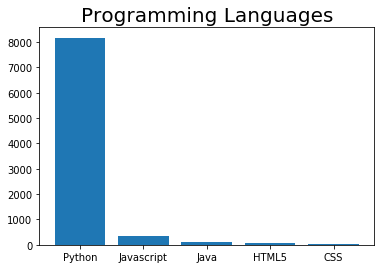

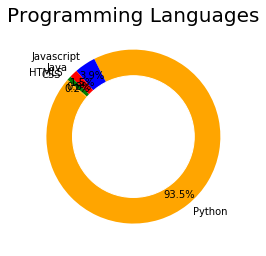

In [140]:
# most used programming language among AI startups
# create data
programming = df.groupby(['tech']).count().name.sort_values(ascending=False)

# labels and values
labels = programming.index.tolist()
values = programming.values.tolist()

# bar chart
plt.bar(np.arange(len(values)), values)
plt.xticks(np.arange(len(values)), labels)
plt.title("Programming Languages", fontsize=20)
plt.show()

# white circle in the middle
white_circle = plt.Circle((0,0), 0.7, color='white')

# donut chart
plt.pie(values, labels=labels, colors=['orange', 'blue', 'red', 'green'],
        pctdistance=0.85,autopct = '%1.1f%%', startangle=140)
p=plt.gcf()
p.gca().add_artist(white_circle)
plt.title("Programming Languages", fontsize=20) 
plt.show()


In [141]:
# modify datetime
df['joined'] = pd.to_datetime(df['joined'], format = '%b \x92%y')
# modify raised
import re
# convert currency to numerics
def currency(s):
    try:
        # change the unit to billions of dollars
        return float(''.join(re.findall(r'\d*', s))) / 1000000000
    except:
        return np.nan
df['raised'] = df['raised'].apply(currency)



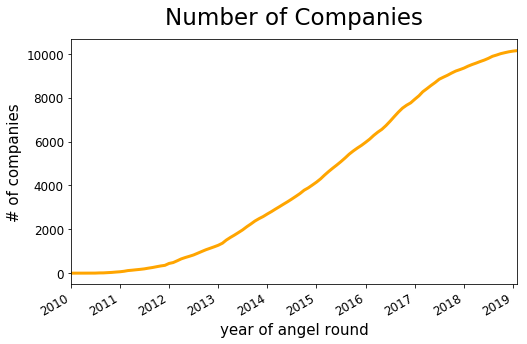

In [169]:
# line graph of # of companies
date_counts = df.groupby('joined').count().name.cumsum()
fig = plt.figure(figsize=[8,5])
plt.title('Number of Companies', fontsize=23, pad = 15)
date_counts.plot( color=['orange'], fontsize=12, linewidth=3)
plt.xlabel('year of angel round', fontsize=15)
plt.ylabel('# of companies', fontsize=15)
plt.show()

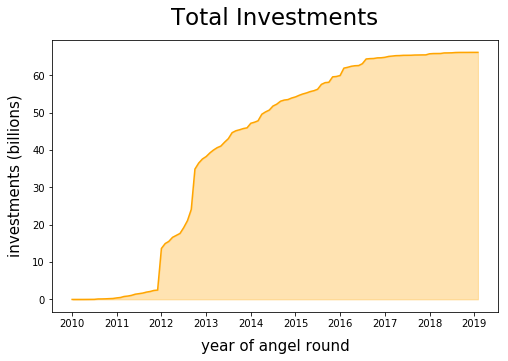

In [168]:
# area graph of total raised
date_raised = df.groupby('joined').sum().raised.cumsum()
dates = date_raised.index.values
fig = plt.figure(figsize=[8,5])
plt.title('Total Investments', fontsize=23, pad = 15)
plt.fill_between(dates, date_raised, color="orange", alpha=0.3)
plt.plot(dates, date_raised, color="orange")
plt.xlabel('year of angel round', fontsize = 15, labelpad = 10)
plt.ylabel('investments (billions)', fontsize = 15, labelpad = 10)
plt.show()

In [70]:
market = df.groupby('market').count().name.sort_values(ascending=False)[:30]